In [19]:
from scipy.io import loadmat
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

># Loading The Data

In [1]:
mnist = loadmat('D:/MachineLearning/datasets/mnist-original.mat')
print(mnist)

X_org = mnist['data']
y = mnist['label']
print('Original shape of data and Label in MNIST :',X_org.shape, y.shape)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014', '__version__': '1.0', '__globals__': [], 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
      dtype=object), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}
Original shape of data and Label in MNIST : (784, 70000) (1, 70000)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_org.T, y.T, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.2, random_state=42)
print('Training data shape :',X_train.shape, y_train.shape)
print('Validation data shape :',X_val.shape, y_val.shape)
print('Testing data shape :',X_test.shape, y_test.shape)

Training data shape : (56000, 784) (56000, 1)
Validation data shape : (11200, 784) (11200, 1)
Testing data shape : (2800, 784) (2800, 1)


In [20]:
X_train_img = X_train.reshape(-1, 28,28,1)
X_val_img = X_val.reshape(-1,28,28,1)
print('Shape of X_train_img and X_val_img :', X_train_img.shape, X_val_img.shape)

y_train_hot = tf.keras.utils.to_categorical(y_train)
y_val_hot = tf.keras.utils.to_categorical(y_val)
print('Shape of y_train and y_validation after converted in 1-Hot-Encoding :', y_train_hot.shape, y_val_hot.shape)

Shape of X_train_img and X_val_img : (56000, 28, 28, 1) (11200, 28, 28, 1)
Shape of y_train and y_validation after converted in 1-Hot-Encoding : (56000, 10) (11200, 10)


># Showing The Data

In [10]:
# plt.rcParams.keys() # Gives the list of all the keys that can be edited

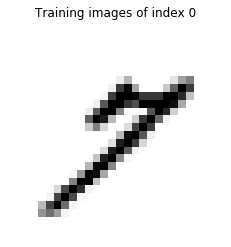

In [23]:
# Plotting constent
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.cmap'] = 'binary'

idx=0
plt.title('Training images of index {}'.format(idx))
plt.imshow(X_train[idx].reshape(28,28))
plt.axis('off')
plt.show()

># Augmenting The Images

In [5]:
def add_noise(img_array):
    var=50
    deviation = var*np.random.random()
    noise = np.random.normal(0, deviation, img_array.shape)
    img_array += noise
    
    return np.clip(img_array, 0.0,255.0)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
rescale=1./255,
rotation_range=20,
zoom_range=0.2,
shear_range=0.2,
preprocessing_function=add_noise,
fill_mode='nearest')

training_generator= train_datagen.flow(X_train_img, y_train_hot, batch_size=32)

val_datagen= ImageDataGenerator(rescale=1./255)
validation_generator= val_datagen.flow(X_val_img, y_val_hot, batch_size=32)

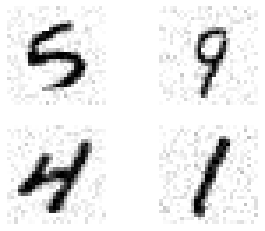

In [24]:
# how ImageDataGenerator produce  images
images=[]
for batch in train_datagen.flow(X_train_img,batch_size=2):
    images.append( batch[0].reshape(28,28)) 
    if len(images) >= 10:
        break

# Display
f, xyarr = plt.subplots(2,2)
xyarr[0,0].imshow(images[0])
xyarr[0,0].axis('off')
xyarr[0,1].imshow(images[1])
xyarr[0,1].axis('off')
xyarr[1,0].imshow(images[2])
xyarr[1,0].axis('off')
xyarr[1,1].imshow(images[3])
plt.axis('off')
plt.show()

># Part 4: Making the Model

In [89]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(2,2)),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, #'sparse_categorical_crossentropy',
             optimizer= 'adam', # tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 4, 4, 64)          16448     
_________________________________________________________________
dropout_40 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 4, 4, 64)        

In [93]:
# custom callback for controlling over training
class myCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>=0.99):
            self.model.stop_training = True
            print('\nTraining stopped due to 99% accuracy reach !')

cb = myCallBacks()

# EarlyStopping to see if the val_accuracy is increasing or not, if not then stopped training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=5,
                                                 mode='max',
                                                 verbose=1)

# ModelCheckpoint to save the model only when val_accu is increased
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('deep_mnist.h5',
                                                      monitor='val_accuracy',
                                                      mode='max',
                                                      save_best_only=True,
                                                      verbose=1)

def plot_loss():
    plt.plot(history.history['loss'],label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
def plot_accu():
    plt.plot(history.history['accuracy'],label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

Epoch 1/100
1750/1750 [==============================] - ETA: 0s - loss: 0.1732 - accuracy: 0.9516
Epoch 00001: val_accuracy improved from -inf to 0.98973, saving model to deep_mnist.h5
1750/1750 [==============================] - 34s 19ms/step - loss: 0.1732 - accuracy: 0.9516 - val_loss: 0.0391 - val_accuracy: 0.9897
Epoch 2/100
1750/1750 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.9507
Epoch 00002: val_accuracy improved from 0.98973 to 0.99018, saving model to deep_mnist.h5
1750/1750 [==============================] - 36s 21ms/step - loss: 0.1721 - accuracy: 0.9507 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 3/100
1748/1750 [============================>.] - ETA: 0s - loss: 0.1738 - accuracy: 0.9511
Epoch 00003: val_accuracy did not improve from 0.99018
1750/1750 [==============================] - 34s 19ms/step - loss: 0.1738 - accuracy: 0.9511 - val_loss: 0.0380 - val_accuracy: 0.9900
Epoch 4/100
1749/1750 [============================>.] - ETA: 0s -

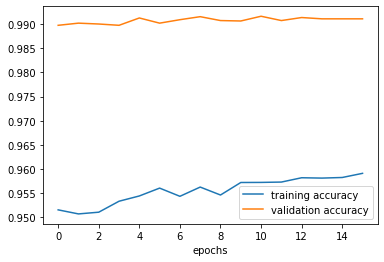

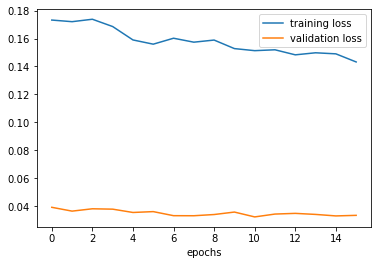

In [99]:
history = model.fit(training_generator, 
                    steps_per_epoch=56000//32,
                    epochs=100,
                    validation_data= validation_generator,
                    validation_steps=11200//32,
                    #callbacks=[early_stopping, cb] #1st use callback to stop at 99% val_accu
                    callbacks=[early_stopping, model_checkpoint]
)
plot_accu()
plot_loss()

In [6]:
# Loading the saved model from disk
saved_model= tf.keras.models.load_model('deep_mnist.h5')

saved_model.layers #checking the model

In [160]:
# Evaluting THIS model on X_test
model.evaluate(X_test.reshape(-1,28,28,1)/255.0, tf.keras.utils.to_categorical(y_test))

88/88 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9900


[0.03164141625165939, 0.9900000095367432]

In [159]:
# Evaluting SAVED model on X_test to check if there any problem with model and saved_model
saved_model.evaluate(X_test.reshape(-1,28,28,1)/255.0, tf.keras.utils.to_categorical(y_test))

88/88 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.9907


[0.03440588712692261, 0.9907143115997314]

># Test On my own image created by MS-Paint

In [246]:
# convert any image to MNIST type image
from PIL import Image,ImageFilter
def prepare(img_loc):
    '''Take a png file and return an array'''
    im = Image.open(img_loc).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImg = Image.new('L', (28,28), (255)) #crete white canvas of 28x28
    
    if width>height:  # if width bigger then convert it to 20
        nheight = int(round((24.0 / width*height),0)) #resize height with width ratio
        if(nheight==0):
            nheight=1
        img = im.resize((24,nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0)) #create horizontal position
        newImg.paste(img, (2,wtop))
    else:
        nwidth = int(round((24.0 / height * width),0)) #resize width with height ratio
        if(nwidth==0):
            nwidth=1
        img = im.resize((24,nwidth), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        hleft = int(round(((28 - nwidth) / 2), 0)) #create vertical position
        newImg.paste(img, (2,hleft))
        
    tv=list(newImg.getdata()) #getting pixel value
    tv_norm = [(255 - x) / 255.0 for x in tv]
    return tv_norm


Actual Image:


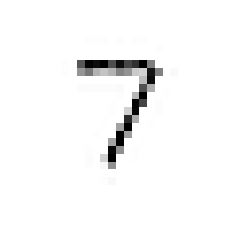

From Saved Model :  7
From Model : 7


In [253]:
# testing the image
imgArr = np.array(prepare('0.png')).reshape(1,28,28,1)

print('Actual Image:')
plt.imshow(imgArr.reshape(28,28), cmap=plt.cm.binary)
plt.axis('off')
plt.show()

print('From Saved Model : ',np.argmax(saved_model.predict(imgArr)))
print('From Model :', np.argmax(model.predict(imgArr)))

# Thank You 

See what conv2D layers get :

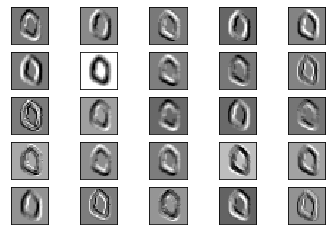

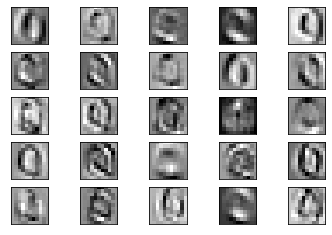

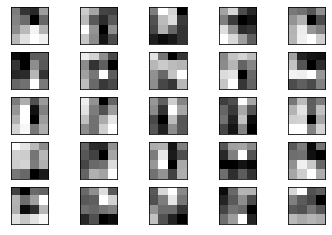

In [16]:
idx=[0,2,4]
outputs = [saved_model.layers[i].output for i in idx]
model = tf.keras.models.Model(inputs=saved_model.inputs, outputs=outputs)

# Loading The image array
img = X_test[1].reshape(1,28,28,1)
feature_maps = model.predict(img/255.0)

# plotting the output
sq=5
for fmap in feature_maps:
    ix=1
    for _ in range(sq):
        for _ in range(sq):
            ax = plt.subplot(sq,sq,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmap[0,:,:,ix-1], cmap='gray')
            ix+=1
    plt.show()